In [1]:
from ultralytics import YOLO
import numpy as np
import cv2
import matplotlib.pyplot as plt

/home/chaitanya/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
image_path = "/home/chaitanya/Academics/3rd_Semester/DLRV/project/data/test_data/image_1458.jpg"

In [3]:
models_path = {
    "YOLOv3" : "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv3.pt",
    "YOLOv5n": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv5n.pt",
    "YOLOv5s": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv5s.pt",
    "YOLOv5m": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv5m.pt",
    "YOLOv5l": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv5l.pt",
    "YOLOv6n": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv6n.pt",
    "YOLOv6s": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv6s.pt",
    "YOLOv6m": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv6m.pt",
    "YOLOv6l": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv6l.pt",
    "YOLOv8n": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv8n.pt",
    "YOLOv8s": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv8s.pt",
    "YOLOv8m": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv8m.pt",
    "YOLOv8l": "/home/chaitanya/Academics/3rd_Semester/DLRV/project/trained_models/YOLOv8l.pt"
}

In [4]:
def boxes_in_roi(boxes, roi_coords):
    """Extracts the boxes that are inside the ROI
    Input:
        boxes: list of boxes in the format [x_min, y_min, x_max, y_max]
        roi_coords: list of coordinates of the ROI in the format [x_min, x_max, y_min, y_max]
    Output:
        Box with maximum area inside the ROI"""
    roi_x_min, roi_x_max, roi_y_min, roi_y_max = roi_coords
    max_area_box = None
    max_area = 0
    for box in boxes:
        box_x_min, box_y_min, box_x_max, box_y_max = box
        if (
            box_x_min >= roi_x_min and box_x_max <= roi_x_max and
            box_y_min >= roi_y_min and box_y_max <= roi_y_max
        ):
            width = box_x_max - box_x_min
            height = box_y_max - box_y_min
            area = width * height

            if area > max_area:
                max_area = area
                max_area_box = box
    return list(max_area_box)

In [5]:
def predict(model_name, image_path):
    model = YOLO(models_path[model_name])
    results = model(image_path)
    box_coordinates = results[0].boxes.xyxy.cpu().numpy()
    return box_coordinates

In [6]:
def filter_box(box_coordinates):
    roi = (10, 630, 240, 470)
    filtered_boxes = boxes_in_roi(box_coordinates, roi)
    return filtered_boxes

In [7]:
all_boxes_predictions = {}
filtered_boxes_predictions = {}

for model_name in models_path.keys():
    
    box_coordinates = predict(model_name, image_path)
    all_boxes_predictions[model_name] = box_coordinates
    filtered_boxes_predictions[model_name] = filter_box(box_coordinates)


image 1/1 /home/chaitanya/Academics/3rd_Semester/DLRV/project/data/test_data/image_1458.jpg: 480x640 5 empty_spaces, 101.7ms
Speed: 1.4ms preprocess, 101.7ms inference, 333.7ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/chaitanya/Academics/3rd_Semester/DLRV/project/data/test_data/image_1458.jpg: 480x640 5 empty_spaces, 28.3ms
Speed: 1.5ms preprocess, 28.3ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/chaitanya/Academics/3rd_Semester/DLRV/project/data/test_data/image_1458.jpg: 480x640 5 empty_spaces, 29.2ms
Speed: 0.8ms preprocess, 29.2ms inference, 0.8ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/chaitanya/Academics/3rd_Semester/DLRV/project/data/test_data/image_1458.jpg: 480x640 5 empty_spaces, 37.7ms
Speed: 0.8ms preprocess, 37.7ms inference, 1.4ms postprocess per image at shape (1, 3, 480, 640)

image 1/1 /home/chaitanya/Academics/3rd_Semester/DLRV/project/data/test_data/image_1458.jpg: 480x640 7 empt

In [8]:
def plot_all_box_predictions(image_path, box_coordinates):
    image = cv2.imread(image_path)
    for box in box_coordinates:
        cv2.rectangle(image, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


In [9]:
def plot_filtered_box_predictions(image_path, box_coordinates):
    box_coordinates = [int(coord) for coord in box_coordinates]
    image = cv2.imread(image_path)
    cv2.rectangle(image, (box_coordinates[0], box_coordinates[1]), (box_coordinates[2], box_coordinates[3]), (0, 255, 0), 2)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()


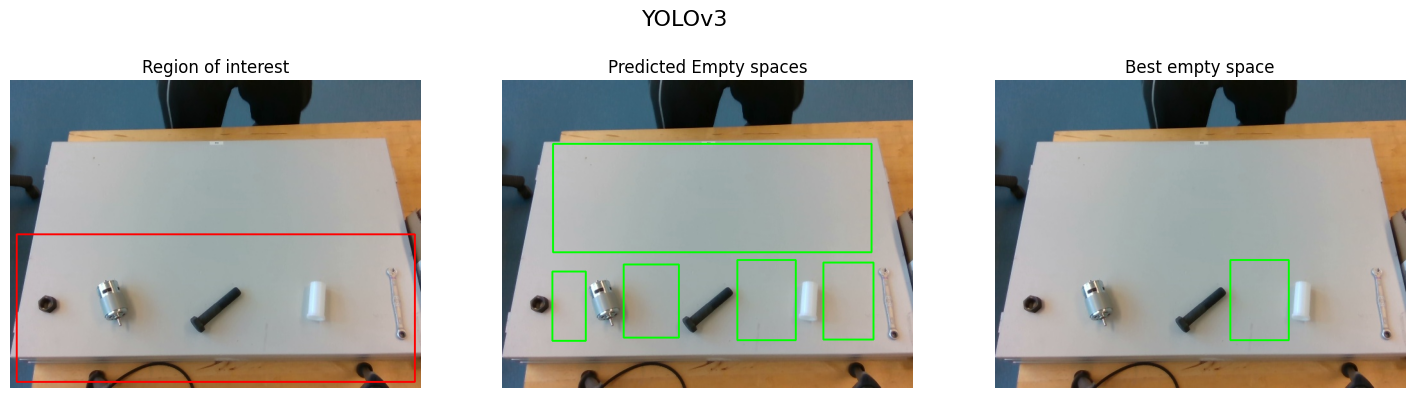

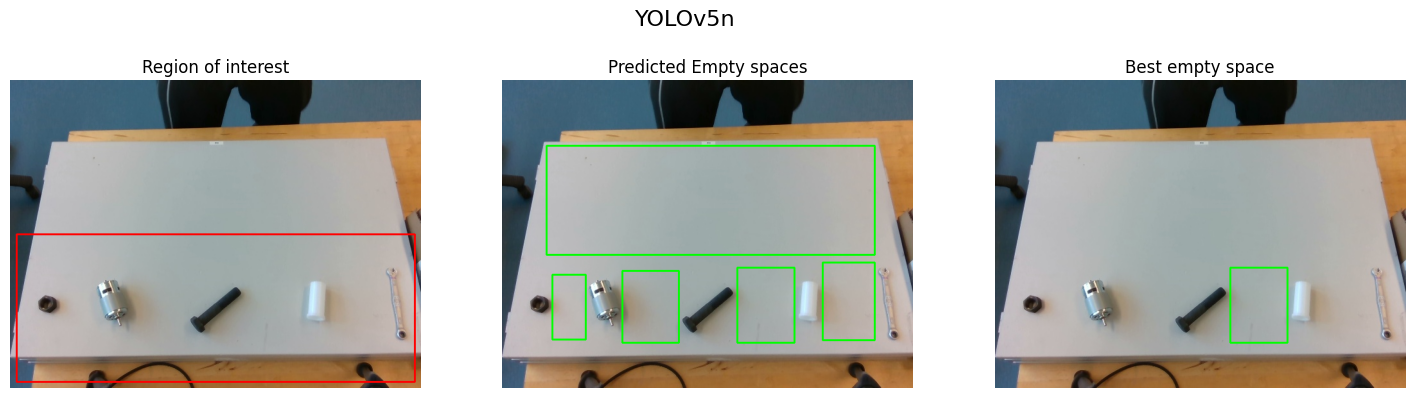

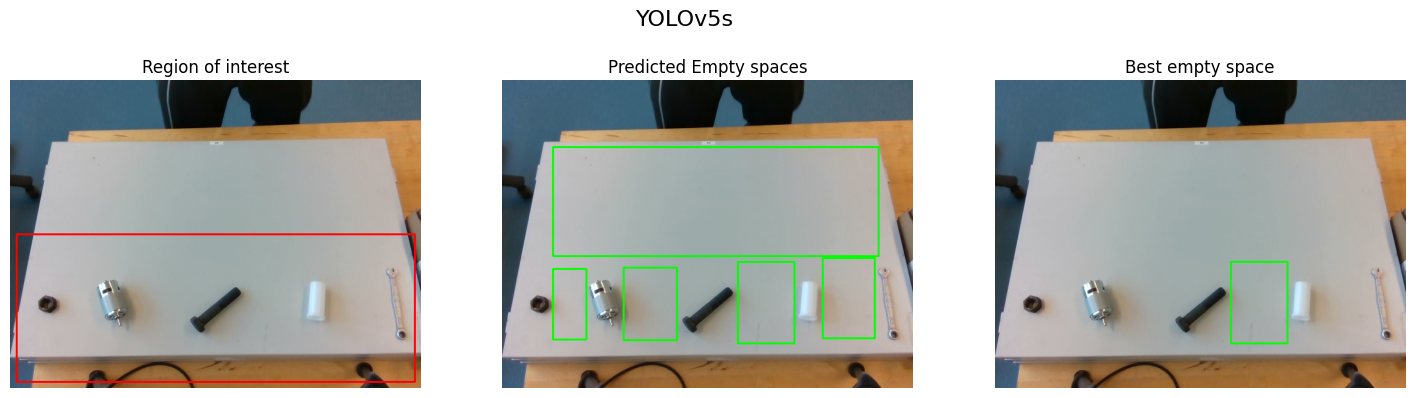

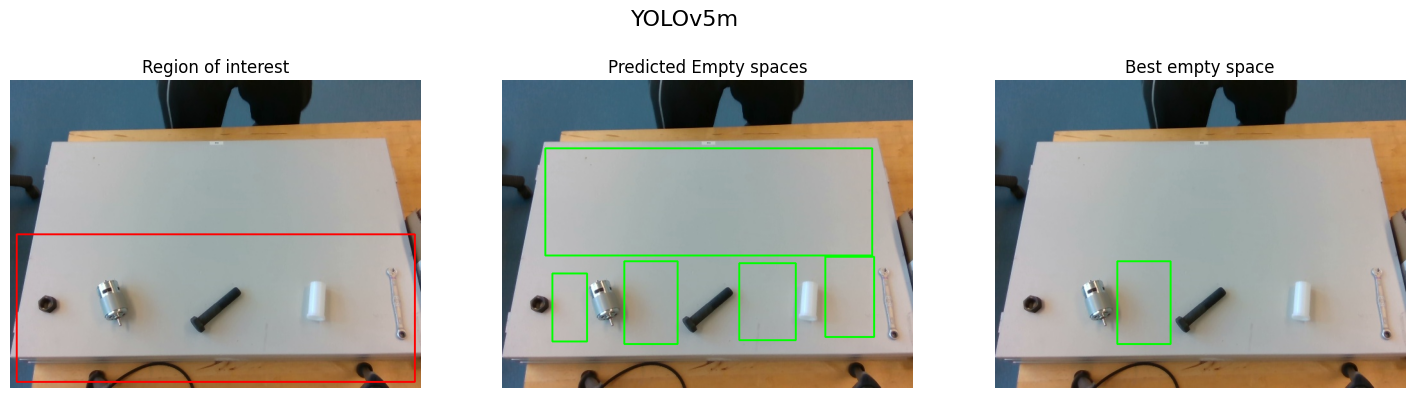

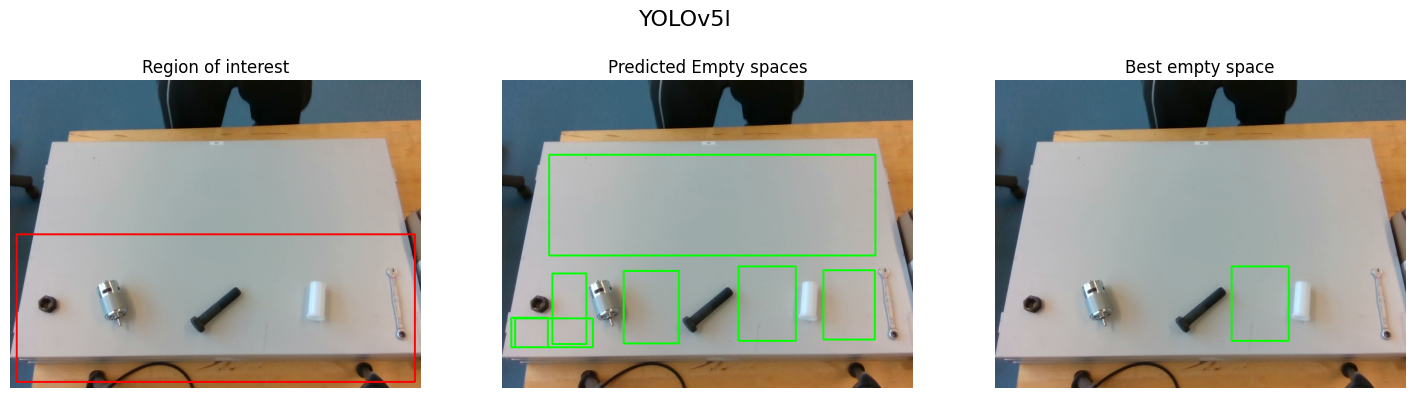

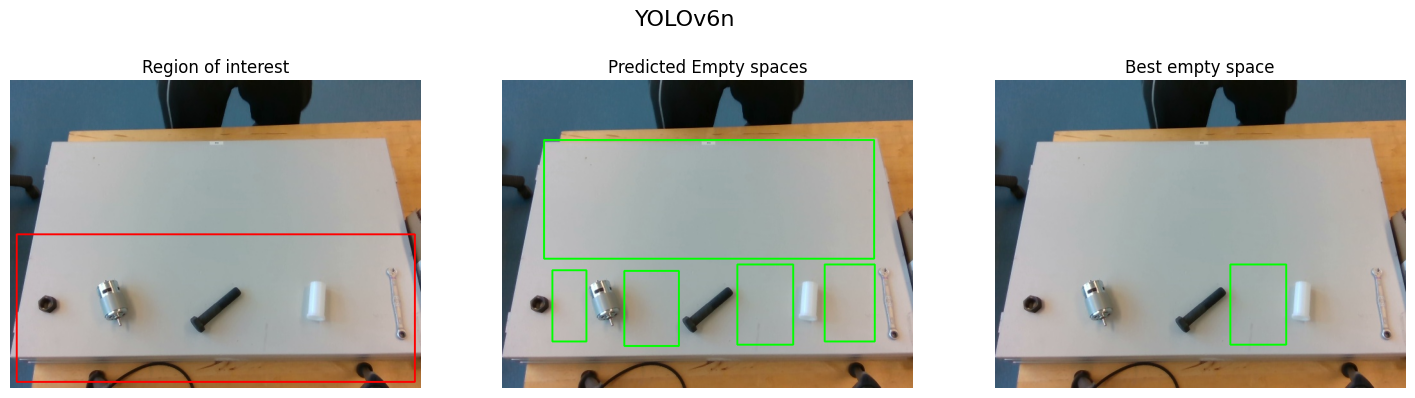

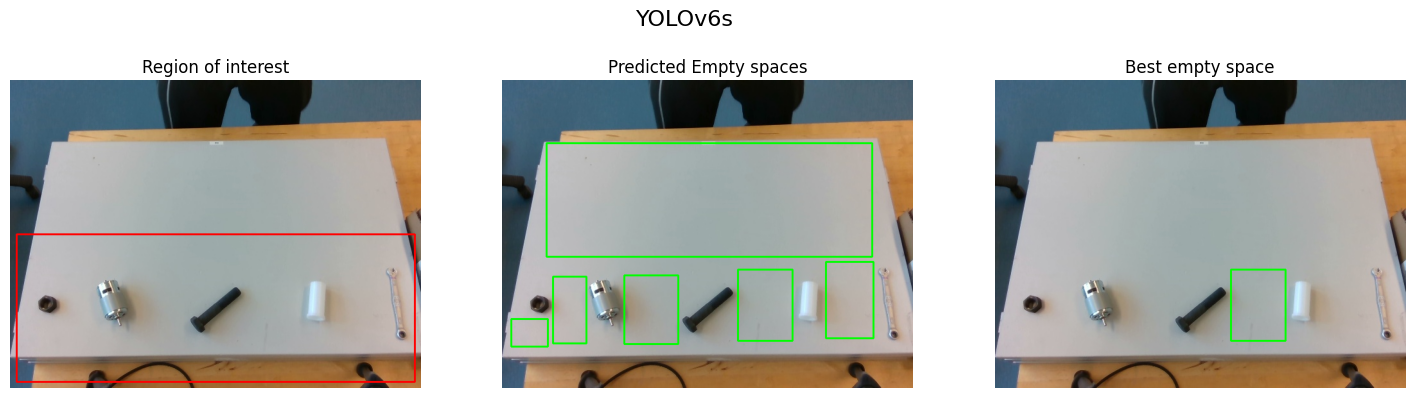

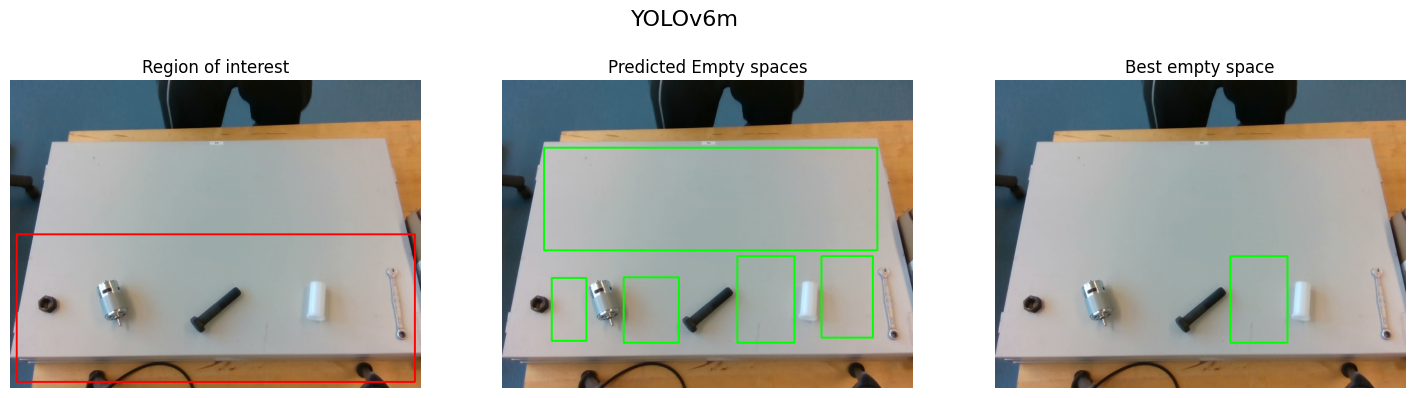

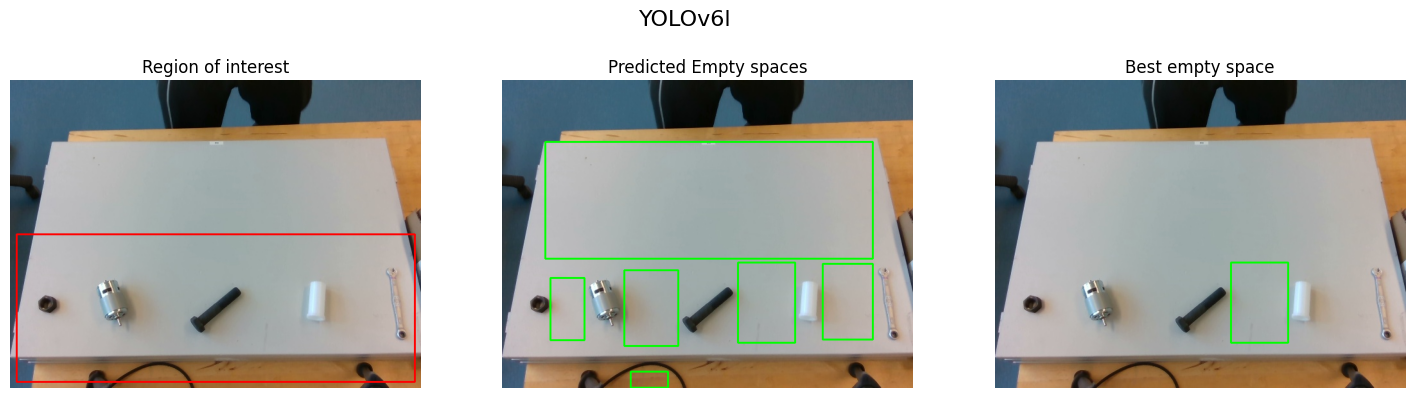

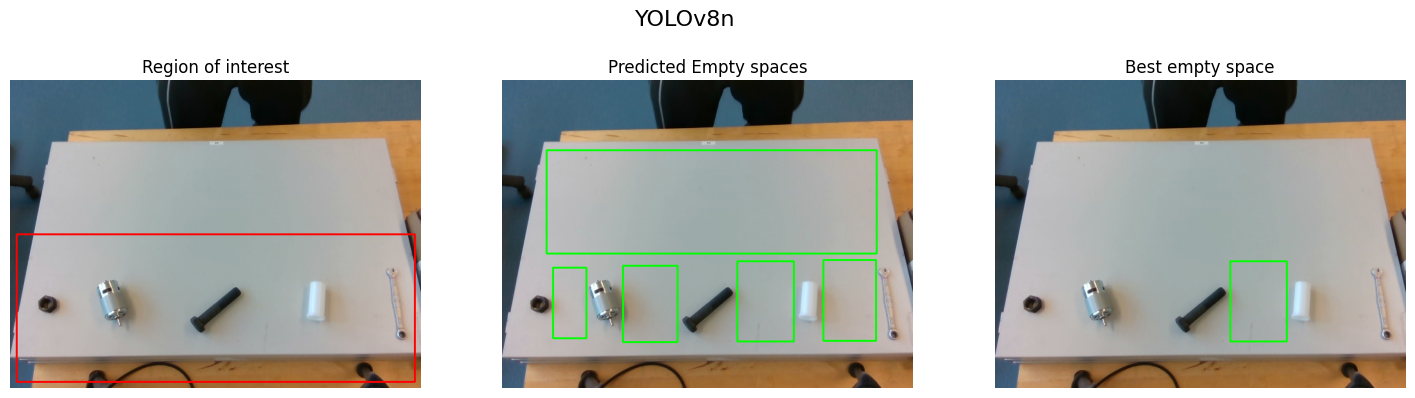

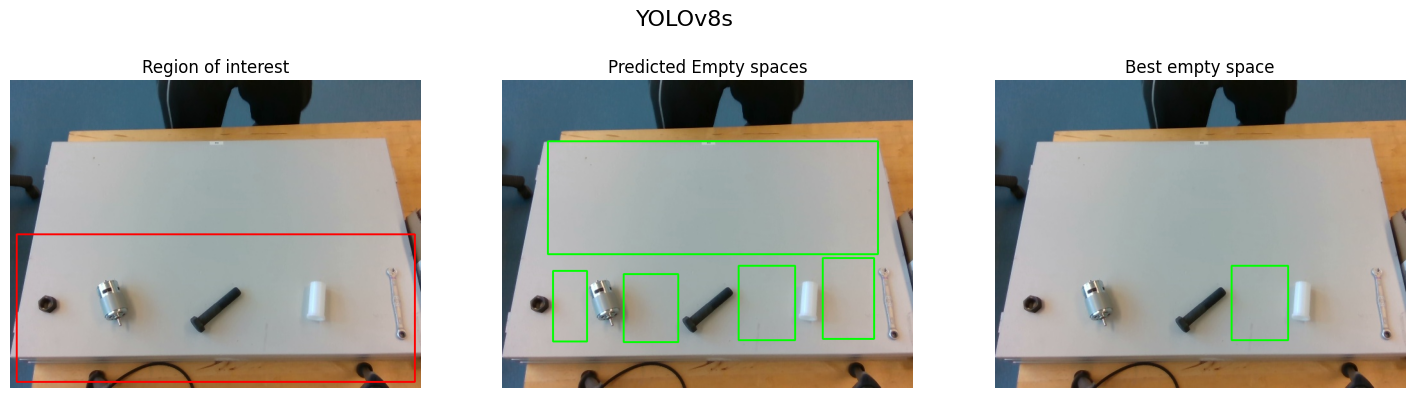

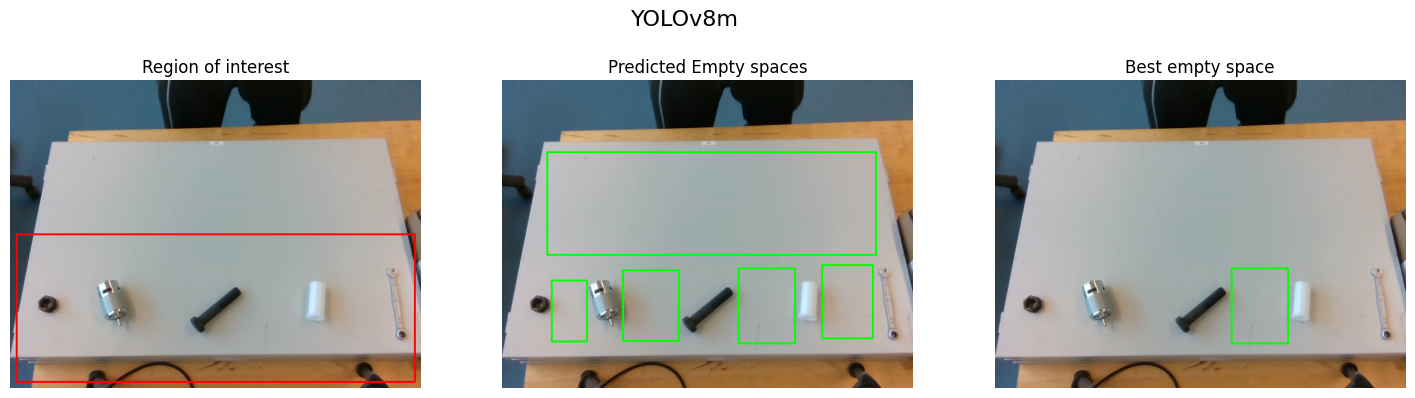

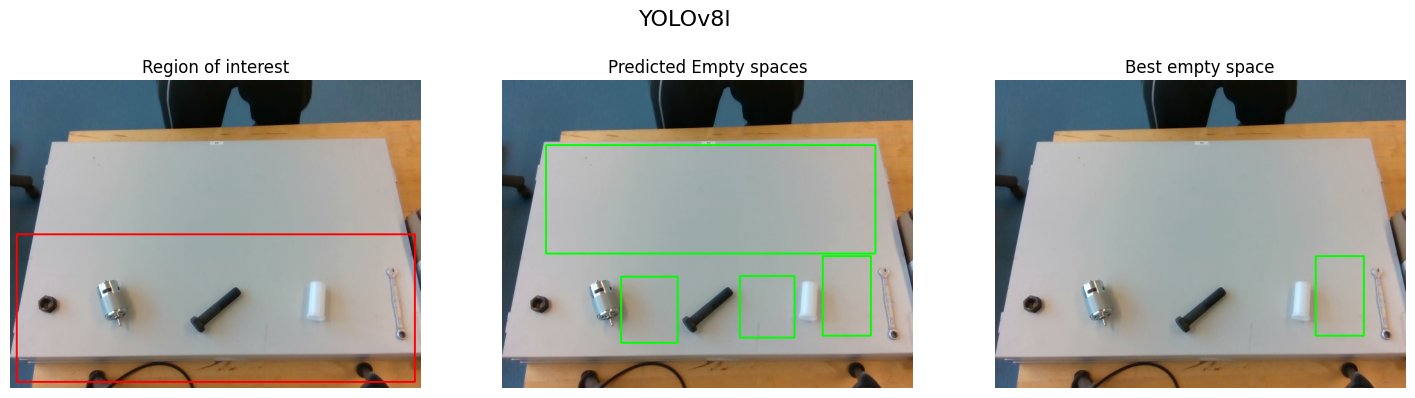

In [10]:
def plot_side_by_side(title, image_path, all_box_coordinates, filtered_box_coordinates):
    fig, ax = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(title, fontsize=16)
    fig.subplots_adjust(top=1.1)
    image_one = cv2.imread(image_path)
    region_of_interest = (10, 630, 240, 470)
    cv2.rectangle(image_one, (region_of_interest[0], region_of_interest[2]), (region_of_interest[1], region_of_interest[3]), (0, 0, 255), 2)
    ax[0].imshow(cv2.cvtColor(image_one, cv2.COLOR_BGR2RGB))
    ax[0].set_title("Region of interest")
    ax[0].axis("off")

    image_two = cv2.imread(image_path)
    for box in all_box_coordinates:
        cv2.rectangle(image_two, (int(box[0]), int(box[1])), (int(box[2]), int(box[3])), (0, 255, 0), 2)
    ax[1].imshow(cv2.cvtColor(image_two, cv2.COLOR_BGR2RGB))
    ax[1].set_title("Predicted Empty spaces")
    ax[1].axis("off")

    image_three = cv2.imread(image_path)
    box_coordinates = [int(coord) for coord in filtered_box_coordinates]
    cv2.rectangle(image_three, (box_coordinates[0], box_coordinates[1]), (box_coordinates[2], box_coordinates[3]), (0, 255, 0), 2)
    ax[2].imshow(cv2.cvtColor(image_three, cv2.COLOR_BGR2RGB))
    ax[2].set_title("Best empty space")
    ax[2].axis("off")
    # plt.savefig(f"/home/chaitanya/Academics/3rd Semester/DLRV/project/plots/predictions/{title}.pdf")
    plt.show()

plot_side_by_side("YOLOv3", image_path, all_boxes_predictions["YOLOv3"], filtered_boxes_predictions["YOLOv3"])
plot_side_by_side("YOLOv5n", image_path, all_boxes_predictions["YOLOv5n"], filtered_boxes_predictions["YOLOv5n"])
plot_side_by_side("YOLOv5s", image_path, all_boxes_predictions["YOLOv5s"], filtered_boxes_predictions["YOLOv5s"])
plot_side_by_side("YOLOv5m", image_path, all_boxes_predictions["YOLOv5m"], filtered_boxes_predictions["YOLOv5m"])
plot_side_by_side("YOLOv5l", image_path, all_boxes_predictions["YOLOv5l"], filtered_boxes_predictions["YOLOv5l"])
plot_side_by_side("YOLOv6n", image_path, all_boxes_predictions["YOLOv6n"], filtered_boxes_predictions["YOLOv6n"])
plot_side_by_side("YOLOv6s", image_path, all_boxes_predictions["YOLOv6s"], filtered_boxes_predictions["YOLOv6s"])
plot_side_by_side("YOLOv6m", image_path, all_boxes_predictions["YOLOv6m"], filtered_boxes_predictions["YOLOv6m"])
plot_side_by_side("YOLOv6l", image_path, all_boxes_predictions["YOLOv6l"], filtered_boxes_predictions["YOLOv6l"])
plot_side_by_side("YOLOv8n", image_path, all_boxes_predictions["YOLOv8n"], filtered_boxes_predictions["YOLOv8n"])
plot_side_by_side("YOLOv8s", image_path, all_boxes_predictions["YOLOv8s"], filtered_boxes_predictions["YOLOv8s"])
plot_side_by_side("YOLOv8m", image_path, all_boxes_predictions["YOLOv8m"], filtered_boxes_predictions["YOLOv8m"])
plot_side_by_side("YOLOv8l", image_path, all_boxes_predictions["YOLOv8l"], filtered_boxes_predictions["YOLOv8l"])